## Dependencies

In [22]:
import os
import pickle
import sys
import pandas as pd
from dotenv import load_dotenv

Configure environment variable

In [23]:
# take environment variables from .env.  
load_dotenv()

# changing current directory to read dataset
os.chdir(os.getenv("DATASET_PATH"))

Setting max columns and rows

In [24]:
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)

Loading datasets

In [25]:
with open('non_playlist_df_top_n.pkl', 'rb') as file:
    non_playlist_df_top_n = pickle.load(file)
    
with open('my_playlist.pkl', 'rb') as file:
    my_playlist = pickle.load(file)

# Generate Recommendations

- Create spotify connection
- Build playlist vectors
- Generate recommendations

In [26]:
my_playlist

id         tracks     artist_names  \
0  7J1uxwnxfQLu4APicE5Rnj    Billie Jean  Michael Jackson   
1  4JehYebiI9JE8sR8MisGVb           Halo          Beyoncé   
2  0wwPcA6wtMf6HUMpIRdeP7  Hotline Bling            Drake   

                 date_added  
0 2022-12-03 18:50:18+00:00  
1 2022-12-03 19:35:20+00:00  
2 2022-12-03 19:36:00+00:00

In [27]:
non_playlist_df_top_n

id                                       name  \
12015   5lA3pwMkBdd24StM90QrNR                P.Y.T. (Pretty Young Thing)   
18917   72TFWvU3wUYdUuxejTTIzt                                       Work   
18862   6g0Orsxv6glTJCt4cHsRsQ                                  Formation   
17278   7jk7gqyEonmVVYahZN5zhW                                     Circus   
74165   2hgzdQdnfWwtdpZbhZlV72                            Ain't Your Mama   
17230   0JiY190vktuhSGN6aqJdrt                                    So What   
17236   3NZJlJemX3mzjf56MqC5ML                                    Forever   
12022   3S2R0EVwBSAVMd5UMgKTL0                                   Thriller   
17221   2VOomzT6VavJOGBeySqaMc                                  Disturbia   
37696   3BtuIIrQlkujKPuWF2B85z                                   Too Good   
12010   1OOtq8tRnDM8kG2gqUPjAj                                    Beat It   
18853   2meEiZKWkiN28gITzFwQo5                                   Into You   
17245   4fixebDZAVToLbUCuEloa2                                  Womanizer   
152821  1GEBsLDvJGw7kviySRI6GX                         You Belong With Me   
18866   76hfruVvmfQbw0eYn1nmeC                          Cake By The Ocean   
18850   6U4VqEHy4n5VeiH4pQPL24                             You're Welcome   
18884   0PDUDa38GO8lMxLCRc4lL1                                 PILLOWTALK   
11411   46eu3SBuFCXWsPT39Yg3tJ             Don't Stop 'Til You Get Enough   
18883   4tCtwWceOPWzenK2HAIJSb       Work from Home (feat. Ty Dolla $ign)   
17222   5R8dQOPq8haW94K7mgERlO                                 Poker Face   
18872   1pKeFVVUOPjFsOABub0OaV                               Side To Side   
17257   0ByMNEPAPpOR5H69DVrTNy                       Don't Stop The Music   
12059   1CgmY8fVN7kstVDZmsdM5k                P.Y.T. (Pretty Young Thing)   
17244   38xWaVFKaxZlMFvzNff2aW                                  Breakeven   
37746   5knuzwU65gJK7IF5yJsuaW    Rockabye (feat. Sean Paul & Anne-Marie)   
17268   21pySLskKIKrhDziCX5ojQ                             When I Grow Up   
18899   0ErK6K0kYr0Ow2RkPMhmMs                         Shout Out to My Ex   
17255   285hMzLhJwHVLe9QT9qilk                                  Breakeven   
17643   1ExfPZEiahqhLyajhybFeS                              The Lazy Song   
17228   5jzX4dWVQeBTtfBaXnMRt5                                DONTTRUSTME   
17232   3goSVuTt3fDYDP6kRnFwuL                                 Take A Bow   
18886   1i1fxkWeaMmKEB4T7zqbzK                          Don't Let Me Down   
56371   4TiKZrN7gtc62SUiufpFCM                                       Dope   
74153   1I6pKIyaBp4OebTGLJpCCC                                       Perm   
74173   6YZdkObH88npeKrrkb8Ggf             DUELE EL CORAZON (feat. Wisin)   
37557   5jE48hhRu8E6zBDPRSkEq7                        All About That Bass   
18986   3O8NlPh2LByMU9lSRSHedm                                  Controlla   
18920   66wkCYWlXzSTQAfnsPBptt                           My Favorite Part   
18865   0v9Wz8o0BT8DU38R4ddjeH    No Problem (feat. Lil Wayne & 2 Chainz)   
17211   2q4rjDy9WhaN3o9MvDbO21                     Kiss Me Thru The Phone   
18885   0azC730Exh71aQlOt9Zj3y  This Is What You Came For (feat. Rihanna)   
19497   0Rx0DJI556Ix5gBny6EWmn                                   Paradise   
18946   37F0uwRSrdzkBiuj0D5UHI                                   Reminder   
17238   3jlbL2OTD5YmIunYzgQTAN                             Live Your Life   
56999   4y5bvROuBDPr5fuwXbIBZR                                Paper Rings   
18852   6b8Be6ljOzmkOmFslEb23P                                  24K Magic   
38139   60cYr5uuMoxvyuIx45rGEW                          Boy In The Bubble   
108516  4PyMK7JTcu6l30D8KogokR                                  supercuts   
124383  4Lt6GXGzYsa1tgkv3nGSTm              Love Not War (The Tampa Beat)   
18863   7l94dyN2hX9c6wWcZQuOGJ                            Dangerous Woman   

                                         artists  cosine_sim  
12015                          [Micha

Comparing mix of songs playlist

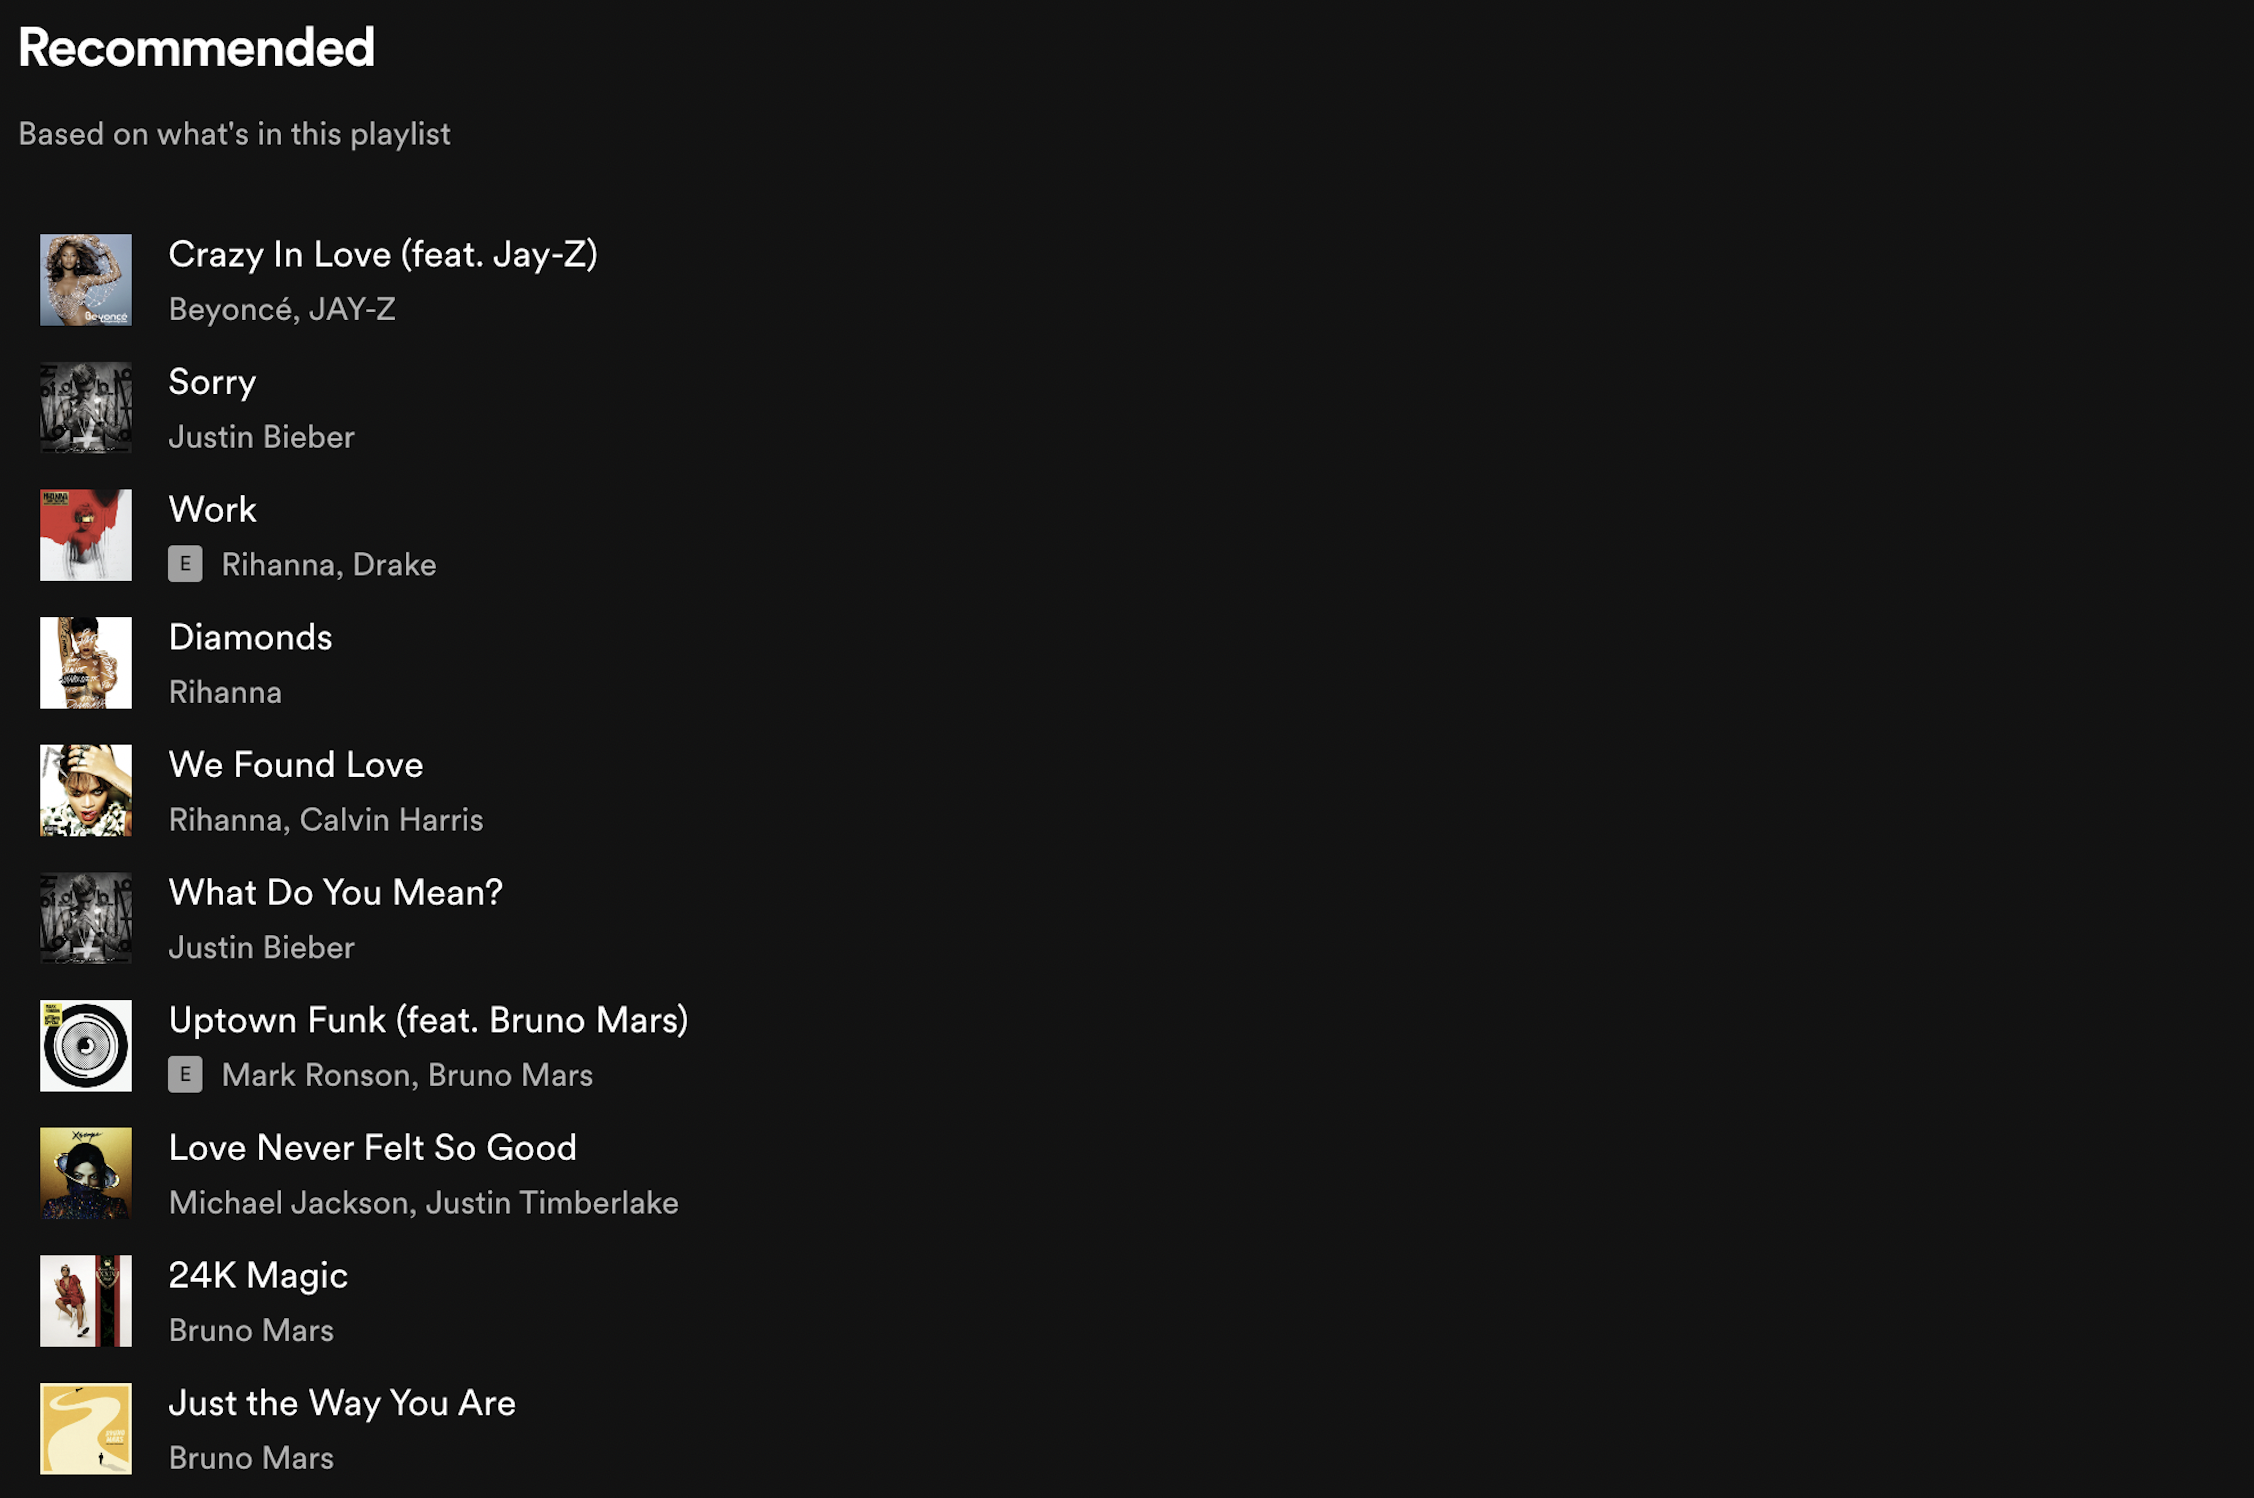